<a href="https://colab.research.google.com/github/yehiayaser/General-Deep-learning-Models/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df=pd.read_csv('/content/train.csv')
df.head()


,Customer_ID,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,1001,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1,1
1,1002,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0,0
2,1003,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0,1
3,1004,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1,0
4,1005,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0,1


In [10]:
df = df.drop('Customer_ID', axis=1)
display(df.head())

,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1,1
1,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0,0
2,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0,1
3,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1,0
4,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0,1


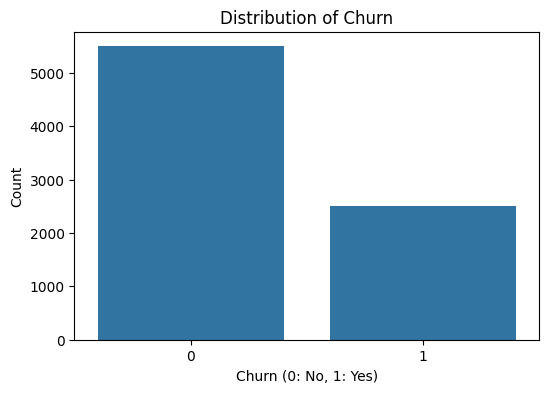

Churn
0    5495
1    2505
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Display the value counts of the target variable
print(df['Churn'].value_counts())

In [12]:
# Display descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
display(df.describe())

# Display value counts for categorical features
print("\nValue Counts for Categorical Features:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    display(df[col].value_counts())

Descriptive Statistics for Numerical Features:


,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,Promo_Opted_In,Churn
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.542250,30.163875,104.804641,254.326625,4.45325,1.99250,49.798000,49.428250,5.462375,1.970500,0.499750,0.313125
std,14.909242,16.942407,54.643255,140.855632,2.88892,1.39971,28.965468,28.662071,2.879865,1.413375,0.500031,0.463794
min,18.000000,1.000000,10.090000,10.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,15.000000,57.637500,133.000000,2.00000,1.00000,24.000000,25.000000,3.000000,1.000000,0.000000,0.000000
50%,44.000000,30.000000,104.690000,256.500000,4.00000,2.00000,51.000000,50.000000,5.000000,2.000000,0.000000,0.000000
75%,57.000000,45.000000,151.697500,376.000000,7.00000,3.00000,75.000000,74.000000,8.000000,3.000000,1.000000,1.000000
max,69.000000,59.000000,199.940000,499.000000,9.00000,4.00000,99.000000,99.000000,10.000000,4.000000,1.000000,1.000000



Value Counts for Categorical Features:

Gender:


,count
Gender,
Female,4035
Male,3965



Location:


,count
Location,
Illinois,1624
New York,1619
Texas,1603
California,1597
Florida,1557



Subscription_Type:


,count
Subscription_Type,
Basic,4063
Premium,3120
Enterprise,817



Last_Interaction_Type:


,count
Last_Interaction_Type,
Neutral,2700
Negative,2650
Positive,2650


In [13]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X

,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In
0,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1
1,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0
2,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0
3,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1
4,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,25,Female,Texas,Basic,9,63.97,446,5,0,41,93,10,Neutral,1,0
7996,31,Male,New York,Basic,55,50.89,90,1,0,24,94,3,Negative,1,0
7997,56,Male,Texas,Basic,20,15.97,177,0,0,9,9,1,Negative,4,1
7998,49,Male,Texas,Premium,54,63.79,195,9,0,16,16,10,Negative,1,0


In [14]:
isnull = X.isnull().sum()
X
isnull


,0
Age,0
Gender,0
Location,0
Subscription_Type,0
Account_Age_Months,0
Monthly_Spending,0
Total_Usage_Hours,0
Support_Calls,0
Late_Payments,0
Streaming_Usage,0


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 15)
Shape of X_test: (1600, 15)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

Shape of processed X_train: (6400, 24)
Shape of processed X_test: (1600, 24)


In [17]:
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_processed, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [18]:
# Predict on the test data
y_pred = mlp_model.predict(X_test_processed)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1086
           1       0.33      0.32      0.32       514

    accuracy                           0.57      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.57      0.57      0.57      1600



##DNN


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model_1=Sequential()
model_1.add(Dense(64,activation='relu',input_shape=(X_train_processed.shape[1],)))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
# You can adjust epochs and batch_size
history = model_1.fit(X_train_processed, y_train, epochs=600, batch_size=15, validation_data=(X_test_processed, y_test))

# Evaluate the model
loss, accuracy = model_1.evaluate(X_test_processed, y_test)
print(f"\nAccuracy of the Keras MLP model on the test set: {accuracy:.4f}")

Epoch 1/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6899 - loss: 0.6263 - val_accuracy: 0.6787 - val_loss: 0.6320
Epoch 2/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6847 - loss: 0.6178 - val_accuracy: 0.6787 - val_loss: 0.6357
Epoch 3/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6788 - loss: 0.6212 - val_accuracy: 0.6787 - val_loss: 0.6349
Epoch 4/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6886 - loss: 0.6076 - val_accuracy: 0.6787 - val_loss: 0.6382
Epoch 5/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6958 - loss: 0.5937 - val_accuracy: 0.6787 - val_loss: 0.6355
Epoch 6/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6944 - loss: 0.5946 - val_accuracy: 0.6756 - val_loss: 0.6344
Epoch 7/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6981 - loss: 0.5845 - val_accuracy: 0.6706 - val_loss: 0.6404
Epoch 8/600
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6967 - loss: 0.5808 - val_accu

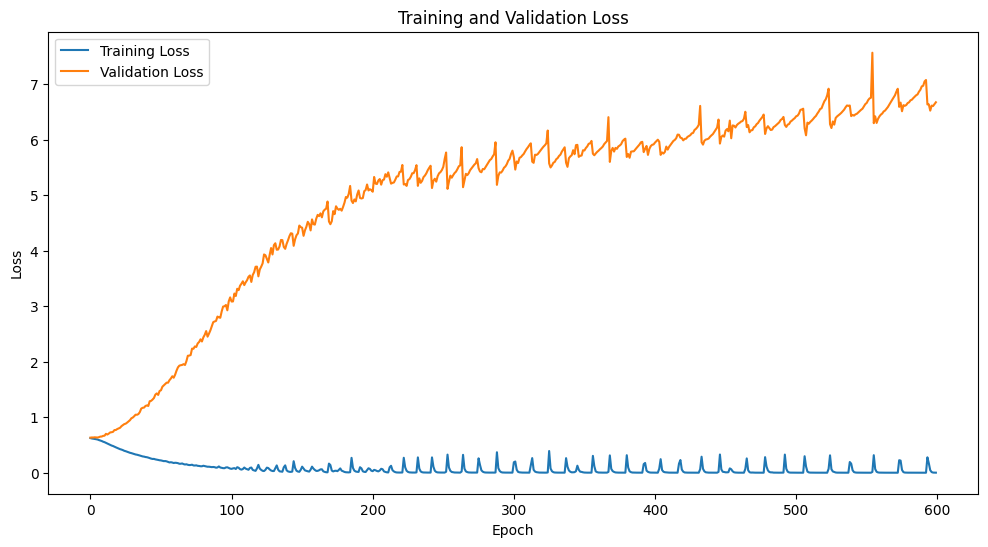

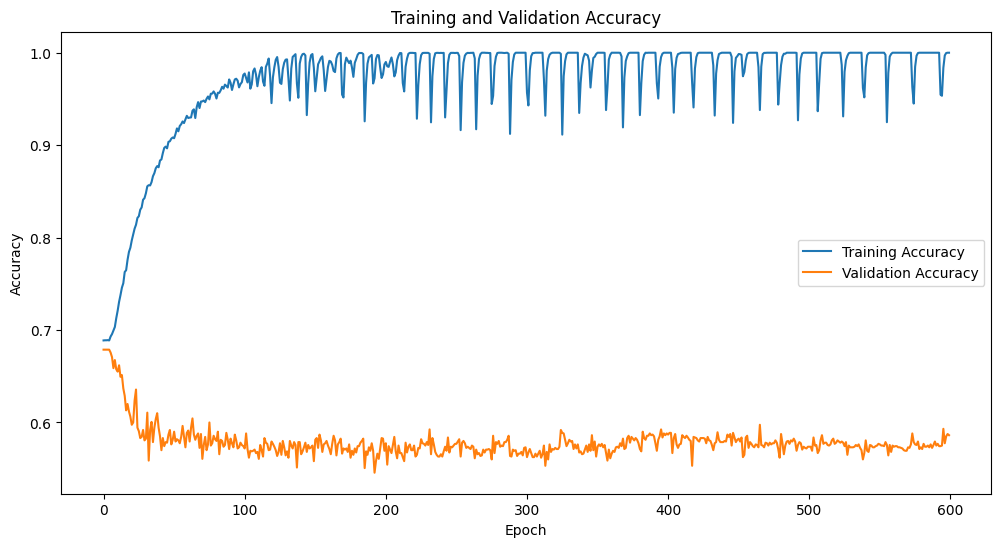

In [29]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()